 Market Basket Analysis is a data-driven technique used to uncover patterns and relationships within large transactional datasets, particularly in retail and e-commerce. It helps businesses understand which products or items are often purchased together, providing insights for optimizing product placement, marketing strategies, and promotions.

In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-basket-dataset/market_basket_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/market-basket-dataset/market_basket_dataset.csv")

In [4]:
data.shape

(500, 5)

In [5]:
data.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [6]:
data.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Price         float64
CustomerID      int64
dtype: object

## Let’s have a look if the data has any null values or not before moving forward:

In [7]:
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

## Now, let’s have a look at the summary statistics of this dataset:

In [8]:
data.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


In [9]:
data['Itemname'].unique()

array(['Apples', 'Butter', 'Eggs', 'Potatoes', 'Oranges', 'Milk',
       'Onions', 'Cereal', 'Tomatoes', 'Bananas', 'Pasta', 'Bread',
       'Coffee', 'Sugar', 'Chicken', 'Cheese', 'Tea', 'Yogurt', 'Juice'],
      dtype=object)

## Now, let’s have a look at the sales distribution of items:

In [10]:
fig = px.histogram(data, x='Itemname',title='Item Distribution')
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



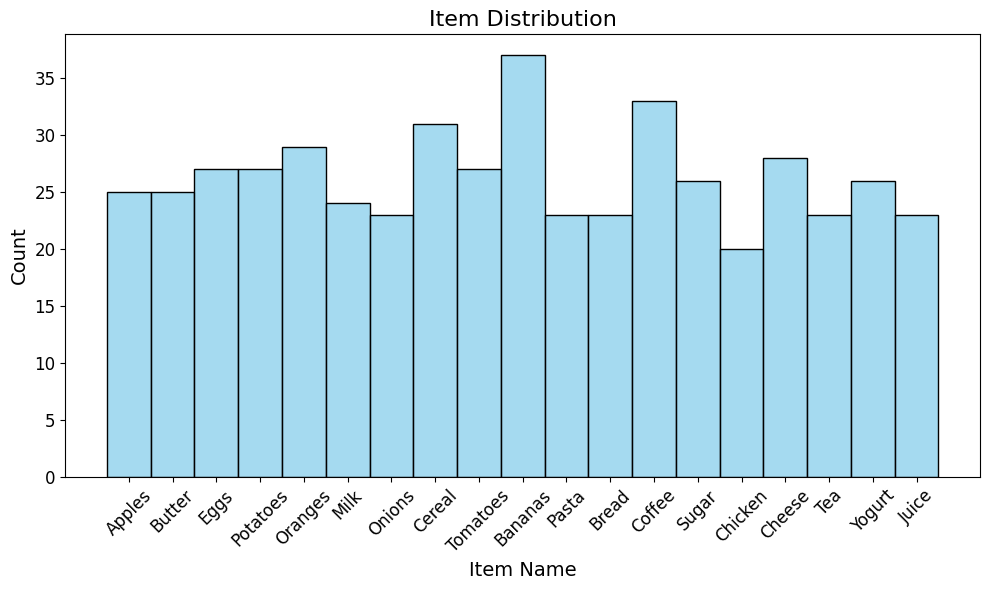

In [14]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Itemname', kde=False, bins=None, color='skyblue')

# Customize the chart
plt.title('Item Distribution', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


## Now, let’s have a look at the top 10 most popular items sold by the store:

In [11]:
# Calculate item popularity
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
fig = go.Figure()
fig.add_trace(go.Bar(x=item_popularity.index[:top_n], y=item_popularity.values[:top_n],
                     text=item_popularity.values[:top_n], textposition='auto',
                     marker=dict(color='skyblue')))
fig.update_layout(title=f'Top {top_n} Most Popular Items',
                  xaxis_title='Item Name', yaxis_title='Total Quantity Sold')
fig.show()

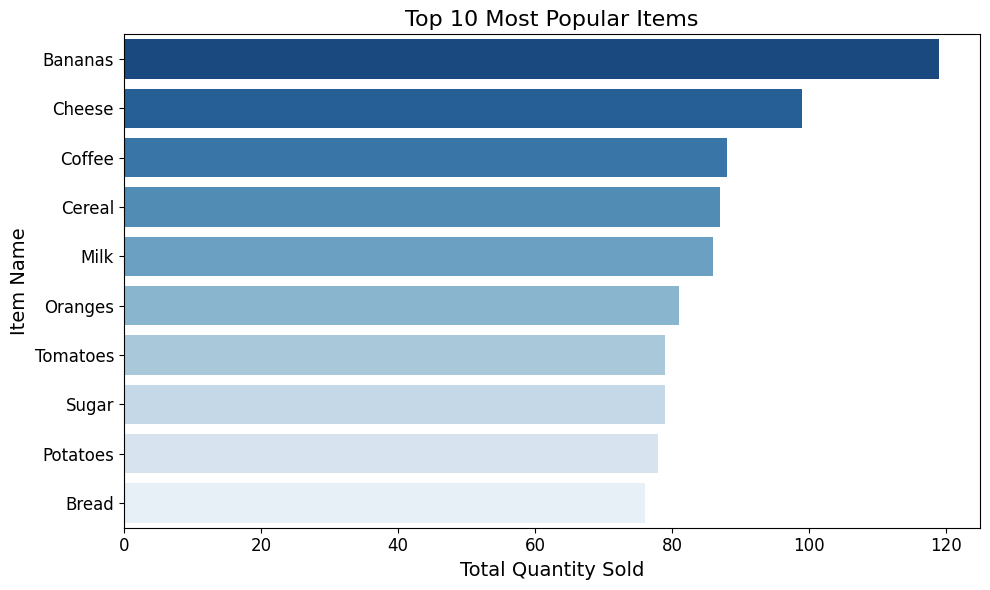

In [12]:
# Step 1: Calculate item popularity
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Step 2: Select the top N items
top_n = 10
top_items = item_popularity.head(top_n)

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='Blues_r')

# Step 4: Customize the chart
plt.title(f'Top {top_n} Most Popular Items', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=14)
plt.ylabel('Item Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 5: Show the chart
plt.tight_layout()
plt.show()

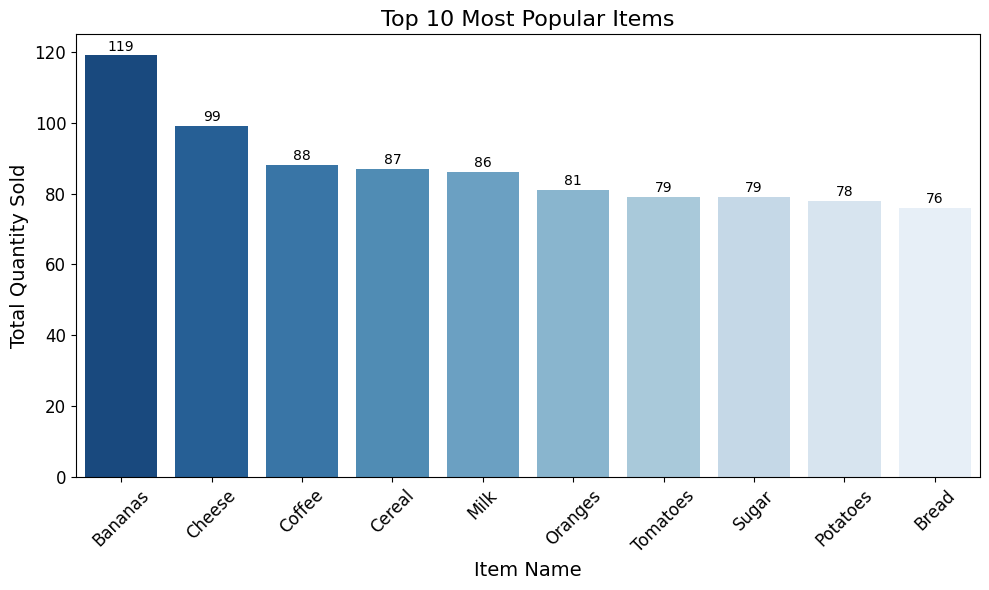

In [13]:
# Step 1: Calculate item popularity
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Step 2: Select the top N items
top_n = 10
top_items = item_popularity.head(top_n)

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='Blues_r')

# Step 4: Add values on top of the bars
for i, value in enumerate(top_items.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Step 5: Customize the chart
plt.title(f'Top {top_n} Most Popular Items', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Show the chart
plt.tight_layout()
plt.show()